In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
df=pd.read_csv("/content/ipl_data.csv")
df.head()

In [4]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64


In [5]:
# Fill missing values if any (example: filling with 0, adjust as needed)
df.fillna(0, inplace=True)
print(df.isnull().sum())

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64


In [8]:
X = df[['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]
y = df['total']
X = pd.get_dummies(X, columns=['venue', 'bat_team', 'bowl_team'], drop_first=True)


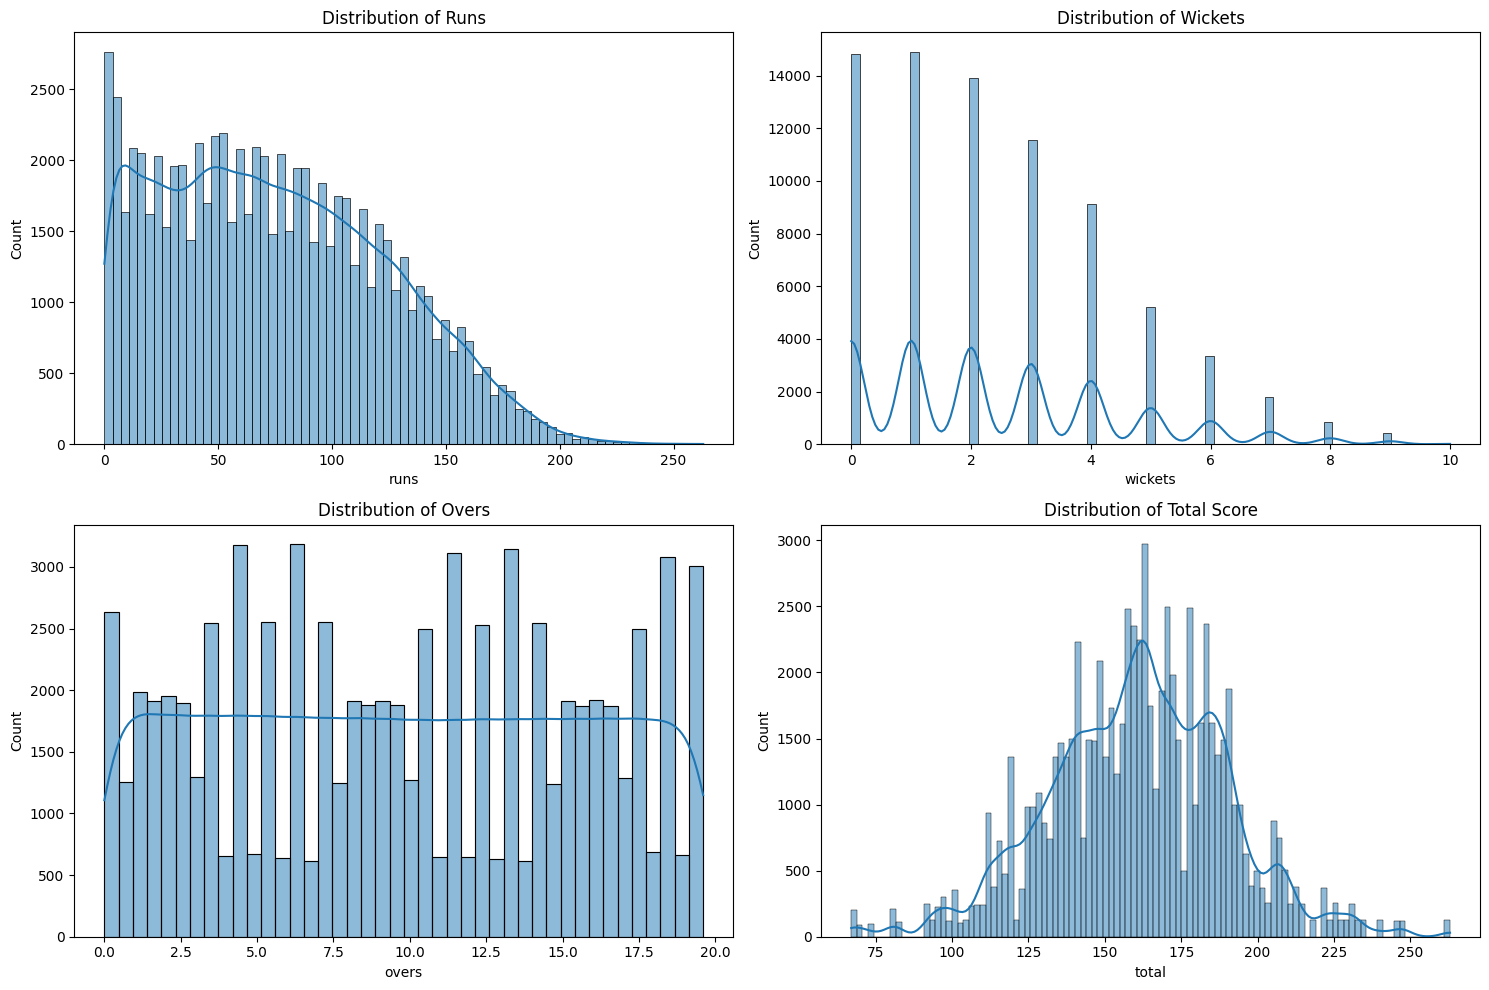

In [9]:
# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['runs'], kde=True)
plt.title('Distribution of Runs')

plt.subplot(2, 2, 2)
sns.histplot(df['wickets'], kde=True)
plt.title('Distribution of Wickets')

plt.subplot(2, 2, 3)
sns.histplot(df['overs'], kde=True)
plt.title('Distribution of Overs')

plt.subplot(2, 2, 4)
sns.histplot(df['total'], kde=True)
plt.title('Distribution of Total Score')

plt.tight_layout()
plt.show()

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error: {mse}")



Mean Squared Error: 73.16939804838088


In [11]:
dummy_columns = X_train.columns
# Create a DataFrame for the example input with all dummy columns
example_input_df = pd.DataFrame(np.zeros((1, len(dummy_columns))), columns=dummy_columns)
# Set values for the known features (adjust column names as needed)
example_input_df['overs'] = 35
example_input_df['wickets'] = 3
example_input_df['runs'] = 180
predicted_score = model.predict(example_input_df)
print(f"\nPredicted Score for example input (35 overs, 3 wickets, 180 runs): {predicted_score[0]}")



Predicted Score for example input (35 overs, 3 wickets, 180 runs): 172.32


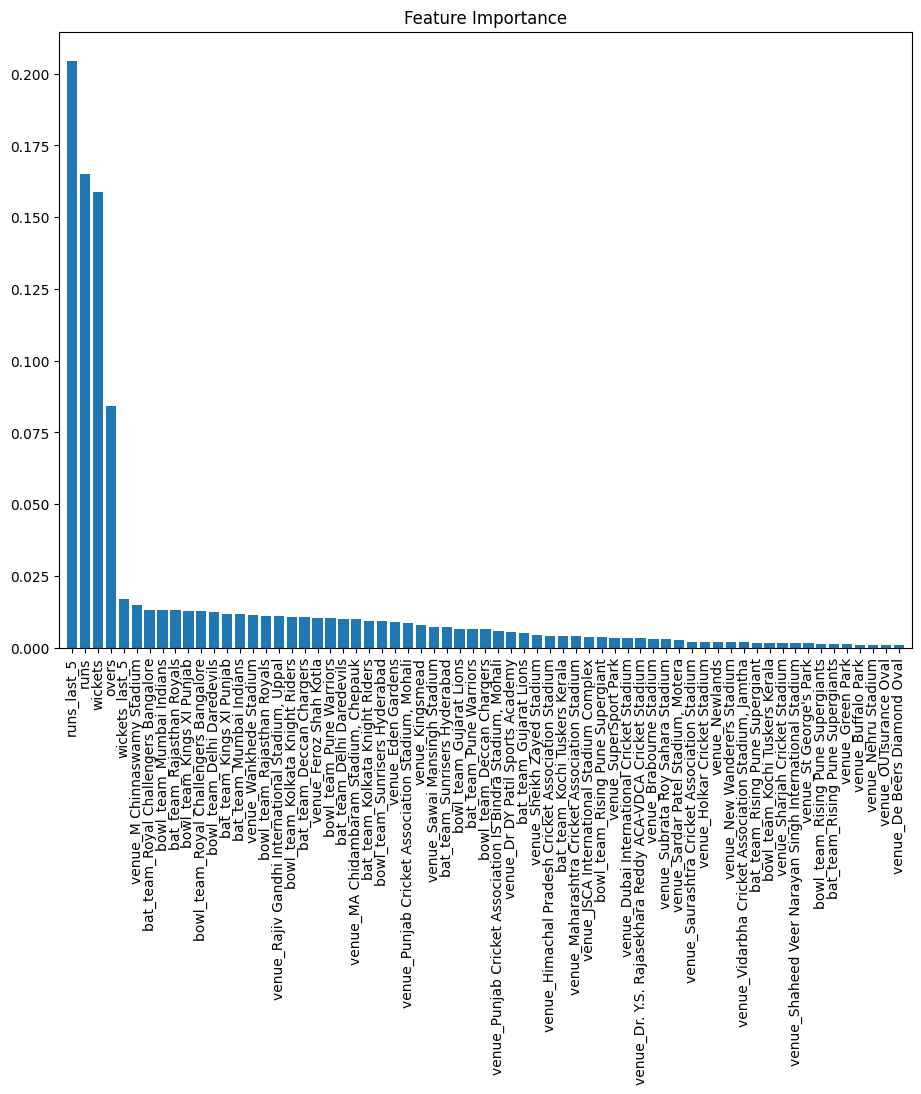

In [12]:

# Plotting feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(11, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

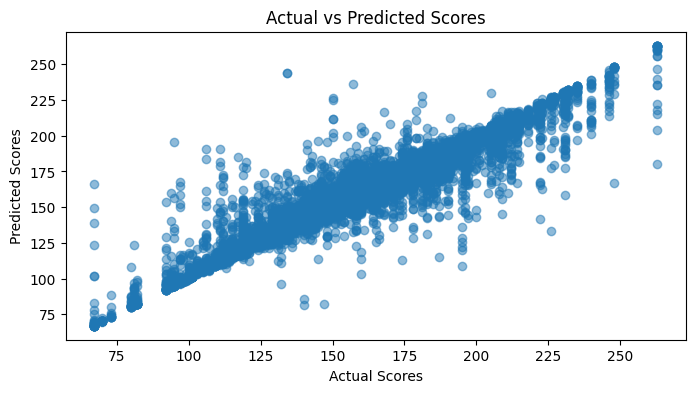

In [13]:
# Plotting actual vs predicted scores
plt.figure(figsize=(8, 4))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ipywidgets as widgets
from IPython.display import display
df=pd.read_csv("/content/ipl_data.csv")
X = df[['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]
y = df['total']
X = pd.get_dummies(X, columns=['venue', 'bat_team', 'bowl_team'], drop_first=True)
venue_options = df['venue'].unique().tolist()
bat_team_options = df['bat_team'].unique().tolist()
bowl_team_options = df['bowl_team'].unique().tolist()

venue_dropdown = widgets.Dropdown(options=venue_options, description='Venue:')
bat_team_dropdown = widgets.Dropdown(options=bat_team_options, description='Bat Team:')
bowl_team_dropdown = widgets.Dropdown(options=bowl_team_options, description='Bowl Team:')
runs_input = widgets.IntText(description='Runs:')
wickets_input = widgets.IntText(description='Wickets:')
overs_input = widgets.FloatText(description='Overs:')
runs_last_5_input = widgets.IntText(description='Runs Last 5:')
wickets_last_5_input = widgets.IntText(description='Wickets Last 5:')
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X,y)

def predict_score(venue, bat_team, bowl_team, runs, wickets, overs, runs_last_5, wickets_last_5):
    input_df = pd.DataFrame({
        'venue': [venue],
        'bat_team': [bat_team],
        'bowl_team': [bowl_team],
        'runs': [runs],
        'wickets': [wickets],
        'overs': [overs],
        'runs_last_5': [runs_last_5],
        'wickets_last_5': [wickets_last_5]
    })
    input_df = pd.get_dummies(input_df, columns=['venue', 'bat_team', 'bowl_team'], drop_first=True)
    input_df = input_df.reindex(columns=df.columns, fill_value=0)
    prediction = model.predict(input_df)[0]
    print(f"Predicted Score: {prediction}")

predict_button = widgets.Button(description='Predict')
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        predict_score(
            venue_dropdown.value, bat_team_dropdown.value, bowl_team_dropdown.value,
            runs_input.value, wickets_input.value, overs_input.value, runs_last_5_input.value, wickets_last_5_input.value
        )

predict_button.on_click(on_predict_button_clicked)

display(venue_dropdown, bat_team_dropdown, bowl_team_dropdown, runs_input, wickets_input, overs_input, runs_last_5_input, wickets_last_5_input, predict_button, output)

Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Bat Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',…

Dropdown(description='Bowl Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevil…

IntText(value=0, description='Runs:')

IntText(value=0, description='Wickets:')

FloatText(value=0.0, description='Overs:')

IntText(value=0, description='Runs Last 5:')

IntText(value=0, description='Wickets Last 5:')

Button(description='Predict', style=ButtonStyle())

Output()

In [18]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
  # Update the path as needed

# Define the unique values for dropdowns
venues = df['venue'].unique().tolist()
bat_teams = df['bat_team'].unique().tolist()
bowl_teams = df['bowl_team'].unique().tolist()

# Create UI elements with original values
venue_widget = widgets.Dropdown(
    options=venues,
    description='Venue:',
)

bat_team_widget = widgets.Dropdown(
    options=bat_teams,
    description='Bat Team:',
)

bowl_team_widget = widgets.Dropdown(
    options=bowl_teams,
    description='Bowl Team:',
)

overs_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=50,
    step=1,
    description='Overs:',
)

wickets_widget = widgets.IntSlider(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Wickets:',
)

runs_widget = widgets.IntText(
    value=0,
    description='Runs:',
)

runs_last_5_widget = widgets.IntText(
    value=0,
    description='Runs (last 5):',
)

wickets_last_5_widget = widgets.IntText(
    value=0,
    description='Wickets (last 5):',
)

output_widget = widgets.Output()

def get_dummy_columns():
    # Get dummy columns from the training data (X)
    return X.columns.tolist()

def predict_score(change):
    dummy_columns = get_dummy_columns()
    example_input_df = pd.DataFrame(np.zeros((1, len(dummy_columns))), columns=dummy_columns)

    # Set values for numerical features
    example_input_df['overs'] = overs_widget.value
    example_input_df['wickets'] = wickets_widget.value
    example_input_df['runs'] = runs_widget.value
    example_input_df['runs_last_5'] = runs_last_5_widget.value
    example_input_df['wickets_last_5'] = wickets_last_5_widget.value

    # Set values for categorical features (one-hot encoding)
    venue_column = f'venue_{venue_widget.value}'
    bat_team_column = f'bat_team_{bat_team_widget.value}'
    bowl_team_column = f'bowl_team_{bowl_team_widget.value}'

    # Check if columns exist before setting values
    if venue_column in dummy_columns:
        example_input_df[venue_column] = 1
    if bat_team_column in dummy_columns:
        example_input_df[bat_team_column] = 1
    if bowl_team_column in dummy_columns:
        example_input_df[bowl_team_column] = 1

    predicted_score = model.predict(example_input_df)

    with output_widget:
        output_widget.clear_output()
        display(f"Predicted Score: {predicted_score[0]:.2f}")

# Create a button to trigger prediction
predict_button = widgets.Button(description='Predict Score')
predict_button.on_click(predict_score)

# Display UI elements
display(venue_widget, bat_team_widget, bowl_team_widget, overs_widget, wickets_widget, runs_widget, runs_last_5_widget, wickets_last_5_widget, predict_button,output_widget )

Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Bat Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',…

Dropdown(description='Bowl Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevil…

IntSlider(value=1, description='Overs:', max=50, min=1)

IntSlider(value=0, description='Wickets:', max=10)

IntText(value=0, description='Runs:')

IntText(value=0, description='Runs (last 5):')

IntText(value=0, description='Wickets (last 5):')

Button(description='Predict Score', style=ButtonStyle())

Output()